In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import shutil
from tqdm import tqdm

In [12]:
!mkdir /kaggle/working/datasets
!mkdir /kaggle/working/datasets/labels
!mkdir /kaggle/working/datasets/images

In [3]:
save_img_path = '/kaggle/working/datasets/images/'
save_label_path = '/kaggle/working/datasets/labels/'
img_path = '/kaggle/input/coco-2017-dataset/coco2017/val2017/'
anno_file = '/kaggle/input/coco-2017-dataset/coco2017/annotations/instances_val2017.json'

In [4]:
with open(anno_file) as js_file:
    data = json.load(js_file)

In [5]:
img_dict = {}

for item in data['images']:
    temp = {}
    temp['file_name'] = item['file_name']
    temp['height'] = item['height']
    temp['width'] = item['width']

    img_dict[item['id']] = temp

In [6]:
person_img_id = []

for item in data['annotations']:
    if item['category_id'] == 1:
        info = img_dict[item['image_id']]
        temp = {
            'info' : info,
            'bbox' : item['bbox']
        }
        person_img_id.append(temp)

In [7]:
def write_label(bbox: list, h, w):
    labels = '0 {:.6f} {:.6f} {:.6f} {:.6f}\n'
    width = bbox[2] / w
    height = bbox[3] / h
    x_center = (bbox[0] + (bbox[2]/2)) / w    
    y_center = (bbox[1] + (bbox[3]/2)) / h
    
    return labels.format(x_center, y_center, width, height)

In [8]:
person_img_id[0]

{'info': {'file_name': '000000425226.jpg', 'height': 640, 'width': 480},
 'bbox': [73.35, 206.02, 300.58, 372.5]}

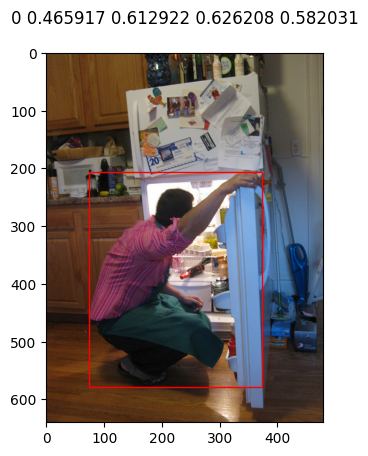

In [9]:
for i in range(len(person_img_id)):
    if i == 1:
        break

    img = plt.imread(img_path + person_img_id[i]['info']['file_name'])
    box = person_img_id[i]['bbox']
    plt.title(write_label(box, person_img_id[i]['info']['height'], person_img_id[i]['info']['width']))
    plt.imshow(img)
    plt.gca().add_patch(Rectangle((box[0], box[1]), box[2], box[3], fill=False, color='red'))
    plt.show()

In [10]:
def create_dataset(person_dict: list):
    for item in tqdm(person_dict):
        img_name = item['info']['file_name'][:-4]
        bbox = item['bbox']
        
        h, w, = item['info']['height'], item['info']['width']
        
        shutil.copyfile(f'{img_path}{img_name}.jpg', f'{save_img_path}{img_name}.jpg')
        
        with open(f'{save_label_path}{img_name}.txt', 'a') as file:
            file.write(write_label(bbox, h, w))

In [13]:
create_dataset(person_img_id)

100%|██████████| 11004/11004 [00:36<00:00, 300.71it/s]


In [ ]:
with open(f'{save_label_path}000000000139.txt', 'r') as f:
    content = f.read()
    print(content)

In [ ]:
img = plt.imread(f'{save_img_path}000000000139.jpg')
plt.imshow(img)
plt.show()

In [14]:
%cd /kaggle/working/datasets

/kaggle/working/datasets


In [17]:
!zip -r datasets.zip ./*

  adding: images/ (stored 0%)
  adding: images/000000050145.jpg (deflated 1%)
  adding: images/000000078565.jpg (deflated 0%)
  adding: images/000000132408.jpg (deflated 3%)
  adding: images/000000177934.jpg (deflated 2%)
  adding: images/000000267191.jpg (deflated 0%)
  adding: images/000000458992.jpg (deflated 0%)
  adding: images/000000326248.jpg (deflated 0%)
  adding: images/000000548246.jpg (deflated 0%)
  adding: images/000000017436.jpg (deflated 1%)
  adding: images/000000336265.jpg (deflated 0%)
  adding: images/000000303305.jpg (deflated 0%)
  adding: images/000000018519.jpg (deflated 0%)
  adding: images/000000460967.jpg (deflated 0%)
  adding: images/000000146667.jpg (deflated 0%)
  adding: images/000000322864.jpg (deflated 0%)
  adding: images/000000157928.jpg (deflated 0%)
  adding: images/000000081394.jpg (deflated 0%)
  adding: images/000000457559.jpg (deflated 3%)
  adding: images/000000410712.jpg (deflated 1%)
  adding: images/000000550691.jpg (deflated 0%)
  adding: 